### RATINGS PREDICTION PROJECT<br><br><br>

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 10000
pd. set_option('display.width', 10000)

In [3]:
# loading the dataset

data_ratings = pd.read_excel(r'C:\\Users\\Lenovo\\Downloads\ratings_df.xlsx')

In [4]:
# checking the dataset

data_ratings.sample(5)

,Unnamed: 0,Product Rating(Out of 5 stars),Product Review
1126,1126,5.0,Super mobileExchange offerGood mi note 3Rs 2000Mobile Phone only 4700 rupeesCome on fast value for money exchange offer
4770,4770,5.0,One of the best phone in 10k range
9928,9928,5.0,"One of the best all in one inkjet printer.Before buying I have done lot of research, either I should buy canon or Epson finally I made a decision & bought epson.. now I am using it from almost 2 months it is working flawlessly. Print Quality is extraordinary.. Print at very very less price compare to any other brand products... Simply go ahead and buy this printer... 🖨😊"
6840,6840,3.0,Best product with price.
14377,14377,5.0,Damn happy with the Purchase previously facing signal issues with tp link 840n complaint my isp provider they suggested me to upgrade the router & was a great suggestion to happy to make the correct move5ghz speed works like charm


In [5]:
# removing unnamed column

data_ratings.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# renaming columns

data_ratings.rename(columns={'Product Rating(Out of 5 stars)':'Product_Rating', 'Product Review':'Product_Review'}, inplace= True)

In [7]:
data_ratings.head()

,Product_Rating,Product_Review
0,1.0,"I purchased the order on Jan 28th and got the delivery of the laptop on Jan 30. I bought an 8 GB RAM version, when I started using the laptop, it was hanging, lagging, and running slowed than my 10-year-old laptop. I spoke with HP and they told me that my laptop was registered for the warranty on Dec 2020. I was shocked. There were multiple files in TEMP folder from May, Sep, Oct and Dec 2020.In the name of BRAND NEW product, the seller is selling OLD/ REFURBISHED product. BEAWARE before you buy it."
1,1.0,Pathetic experience... while having 8gb RAM performance is very slow... battery run for 2-3 hours.
2,1.0,"Processing is dam slow. My dell laptop which was purchased 10 years back is faster than this.Tough they say i3, 11 Gen and 8 GB Ram, do not fall for this. It's absolutely rubbish.Sincere advise, do not buy this product."
3,2.0,"I was delighted to see affordable laptop with Intel i3 11th generation with good specs. From the time I opened the machine I felt let down by HP.1. The build quality is really bad. This is my Third HP Laptop and none of the ones I used before had this poor plastics.2. The camera is another huge letdown.3. The major cause of worry is the performance of the system as whole. Though it had better performing Processor and 8 GB RAM, every app takes time to load, horrible lag right from the first time I started the system. Please refer to the attached Screenshot - with just one broser and explorer open the Disk, Memory are shooting up. Everytime I check two of the 3 parameters (Disk, Memory, CPU) will be hovering around 85-100. Not expected of a new machine.I feel very low to know the investment is bad right from day 1. I think HP wants to milk the rush to buy laptops during Covid lockdown by WFH/Study from School kids. Hope Amazon will pass this feedback to HP as well."
4,1.0,"just received today 22 jan 2021, but model name different its dw3000 , poor performance with hdd , will try to add SSD and review again. but till now its really really slow"


In [8]:
# checking shape of the dataset

data_ratings.shape

(20000, 2)

In [9]:
# checking null values

data_ratings.isnull().sum()

Product_Rating    0
Product_Review    6
dtype: int64

In [10]:
# replacing null values in Product_Review with 'No Review'

data_ratings["Product_Review"].fillna("No Review", inplace = True)

In [11]:
# checking unique values in ratings

data_ratings["Product_Rating"].value_counts()

5.0    7558
1.0    4665
4.0    4169
3.0    2229
2.0    1379
Name: Product_Rating, dtype: int64

In [12]:
# creating new column for length of review
data_ratings['length']=data_ratings.Product_Review.str.len()
data_ratings.head()

,Product_Rating,Product_Review,length
0,1.0,"I purchased the order on Jan 28th and got the delivery of the laptop on Jan 30. I bought an 8 GB RAM version, when I started using the laptop, it was hanging, lagging, and running slowed than my 10-year-old laptop. I spoke with HP and they told me that my laptop was registered for the warranty on Dec 2020. I was shocked. There were multiple files in TEMP folder from May, Sep, Oct and Dec 2020.In the name of BRAND NEW product, the seller is selling OLD/ REFURBISHED product. BEAWARE before you buy it.",510
1,1.0,Pathetic experience... while having 8gb RAM performance is very slow... battery run for 2-3 hours.,104
2,1.0,"Processing is dam slow. My dell laptop which was purchased 10 years back is faster than this.Tough they say i3, 11 Gen and 8 GB Ram, do not fall for this. It's absolutely rubbish.Sincere advise, do not buy this product.",225
3,2.0,"I was delighted to see affordable laptop with Intel i3 11th generation with good specs. From the time I opened the machine I felt let down by HP.1. The build quality is really bad. This is my Third HP Laptop and none of the ones I used before had this poor plastics.2. The camera is another huge letdown.3. The major cause of worry is the performance of the system as whole. Though it had better performing Processor and 8 GB RAM, every app takes time to load, horrible lag right from the first time I started the system. Please refer to the attached Screenshot - with just one broser and explorer open the Disk, Memory are shooting up. Everytime I check two of the 3 parameters (Disk, Memory, CPU) will be hovering around 85-100. Not expected of a new machine.I feel very low to know the investment is bad right from day 1. I think HP wants to milk the rush to buy laptops during Covid lockdown by WFH/Study from School kids. Hope Amazon will pass this feedback to HP as well.",983
4,1.0,"just received today 22 jan 2021, but model name different its dw3000 , poor performance with hdd , will try to add SSD and review again. but till now its really really slow",181


In [13]:
# converting all reviews to lower case

data_ratings['Product_Review'] = data_ratings['Product_Review'].str.lower()

In [14]:
# here we can see the reviews converted to lower case

data_ratings.head()

,Product_Rating,Product_Review,length
0,1.0,"i purchased the order on jan 28th and got the delivery of the laptop on jan 30. i bought an 8 gb ram version, when i started using the laptop, it was hanging, lagging, and running slowed than my 10-year-old laptop. i spoke with hp and they told me that my laptop was registered for the warranty on dec 2020. i was shocked. there were multiple files in temp folder from may, sep, oct and dec 2020.in the name of brand new product, the seller is selling old/ refurbished product. beaware before you buy it.",510
1,1.0,pathetic experience... while having 8gb ram performance is very slow... battery run for 2-3 hours.,104
2,1.0,"processing is dam slow. my dell laptop which was purchased 10 years back is faster than this.tough they say i3, 11 gen and 8 gb ram, do not fall for this. it's absolutely rubbish.sincere advise, do not buy this product.",225
3,2.0,"i was delighted to see affordable laptop with intel i3 11th generation with good specs. from the time i opened the machine i felt let down by hp.1. the build quality is really bad. this is my third hp laptop and none of the ones i used before had this poor plastics.2. the camera is another huge letdown.3. the major cause of worry is the performance of the system as whole. though it had better performing processor and 8 gb ram, every app takes time to load, horrible lag right from the first time i started the system. please refer to the attached screenshot - with just one broser and explorer open the disk, memory are shooting up. everytime i check two of the 3 parameters (disk, memory, cpu) will be hovering around 85-100. not expected of a new machine.i feel very low to know the investment is bad right from day 1. i think hp wants to milk the rush to buy laptops during covid lockdown by wfh/study from school kids. hope amazon will pass this feedback to hp as well.",983
4,1.0,"just received today 22 jan 2021, but model name different its dw3000 , poor performance with hdd , will try to add ssd and review again. but till now its really really slow",181


In [15]:
# Remove punctuation
data_ratings['Product_Review'] = data_ratings['Product_Review'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
data_ratings['Product_Review'] = data_ratings['Product_Review'].str.replace(r'\s+', ' ')

# Remove leading andtrailing whitespace
data_ratings['Product_Review'] = data_ratings['Product_Review'].str.replace(r'^\s+|\s+?$', ' ')

In [16]:
data_ratings.head(5)

,Product_Rating,Product_Review,length
0,1.0,i purchased the order on jan 28th and got the delivery of the laptop on jan 30 i bought an 8 gb ram version when i started using the laptop it was hanging lagging and running slowed than my 10 year old laptop i spoke with hp and they told me that my laptop was registered for the warranty on dec 2020 i was shocked there were multiple files in temp folder from may sep oct and dec 2020 in the name of brand new product the seller is selling old refurbished product beaware before you buy it,510
1,1.0,pathetic experience while having 8gb ram performance is very slow battery run for 2 3 hours,104
2,1.0,processing is dam slow my dell laptop which was purchased 10 years back is faster than this tough they say i3 11 gen and 8 gb ram do not fall for this it s absolutely rubbish sincere advise do not buy this product,225
3,2.0,i was delighted to see affordable laptop with intel i3 11th generation with good specs from the time i opened the machine i felt let down by hp 1 the build quality is really bad this is my third hp laptop and none of the ones i used before had this poor plastics 2 the camera is another huge letdown 3 the major cause of worry is the performance of the system as whole though it had better performing processor and 8 gb ram every app takes time to load horrible lag right from the first time i started the system please refer to the attached screenshot with just one broser and explorer open the disk memory are shooting up everytime i check two of the 3 parameters disk memory cpu will be hovering around 85 100 not expected of a new machine i feel very low to know the investment is bad right from day 1 i think hp wants to milk the rush to buy laptops during covid lockdown by wfh study from school kids hope amazon will pass this feedback to hp as well,983
4,1.0,just received today 22 jan 2021 but model name different its dw3000 poor performance with hdd will try to add ssd and review again but till now its really really slow,181


In [17]:
# Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

data_ratings['Product_Review'] = data_ratings['Product_Review'].apply(lambda x: ' '.join(
term for term in x.split() if term not in stop_words))

In [18]:
# Adding new column clean_length

data_ratings['clean_length'] = data_ratings.Product_Review.str.len()
data_ratings.head()

,Product_Rating,Product_Review,length,clean_length
0,1.0,purchased order jan 28th got delivery laptop jan 30 bought 8 gb ram version started using laptop hanging lagging running slowed 10 year old laptop spoke hp told laptop registered warranty dec 2020 shocked multiple files temp folder may sep oct dec 2020 name brand new product seller selling old refurbished product beaware buy,510,326
1,1.0,pathetic experience 8gb ram performance slow battery run 2 3 hours,104,66
2,1.0,processing dam slow dell laptop purchased 10 years back faster tough say i3 11 gen 8 gb ram fall absolutely rubbish sincere advise buy product,225,142
3,2.0,delighted see affordable laptop intel i3 11th generation good specs time opened machine felt let hp 1 build quality really bad third hp laptop none ones used poor plastics 2 camera another huge letdown 3 major cause worry performance system whole though better performing processor 8 gb ram every app takes time load horrible lag right first time started system please refer attached screenshot one broser explorer open disk memory shooting everytime check two 3 parameters disk memory cpu hovering around 85 100 expected new machine feel low know investment bad right day 1 think hp wants milk rush buy laptops covid lockdown wfh study school kids hope amazon pass feedback hp well,983,682
4,1.0,received today 22 jan 2021 model name different dw3000 poor performance hdd try add ssd review till really really slow,181,118


In [19]:
# Total length removal

print('Original Length', data_ratings.length.sum())
print('Clean length', data_ratings.clean_length.sum())

Original Length 5157111
Clean length 3359701


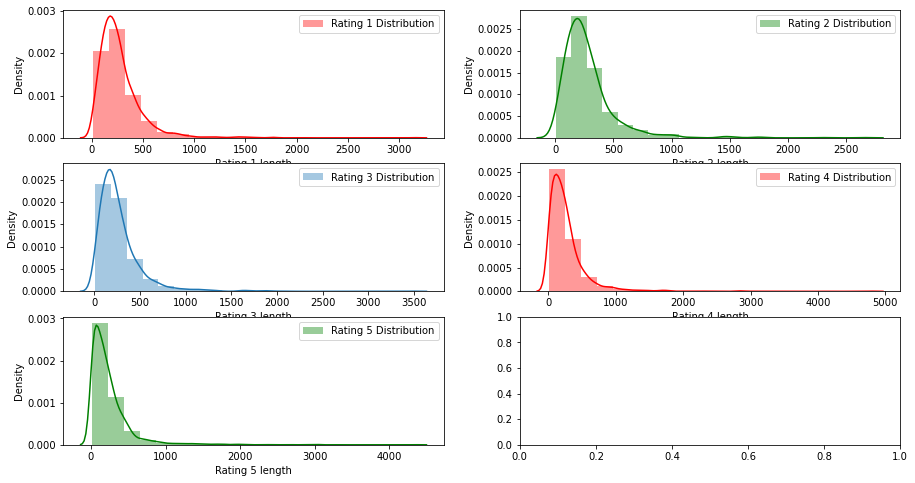

In [20]:
# Message distribution before cleaning

f,ax= plt.subplots(3,2,figsize = (15,8))

sns.distplot(data_ratings[data_ratings['Product_Rating']==1.0]['length'],bins=20,ax=ax[0,0], label = 'Rating 1 Distribution', color ='r')

ax[0,0].set_xlabel('Rating 1 length')
ax[0,0].legend()


sns.distplot(data_ratings[data_ratings['Product_Rating']==2.0]['length'],bins=20,ax=ax[0,1], label = 'Rating 2 Distribution', color = 'g')

ax[0,1].set_xlabel('Rating 2 length')
ax[0,1].legend()


sns.distplot(data_ratings[data_ratings['Product_Rating']==3.0]['length'],bins=20,ax=ax[1,0], label = 'Rating 3 Distribution')

ax[1,0].set_xlabel('Rating 3 length')
ax[1,0].legend()


sns.distplot(data_ratings[data_ratings['Product_Rating']==4.0]['length'],bins=20,ax=ax[1,1], label = 'Rating 4 Distribution', color = 'r')

ax[1,1].set_xlabel('Rating 4 length')
ax[1,1].legend()



sns.distplot(data_ratings[data_ratings['Product_Rating']==5.0]['length'],bins=20,ax=ax[2,0], label = 'Rating 5 Distribution', color= 'g')

ax[2,0].set_xlabel('Rating 5 length')
ax[2,0].legend()


plt.show()

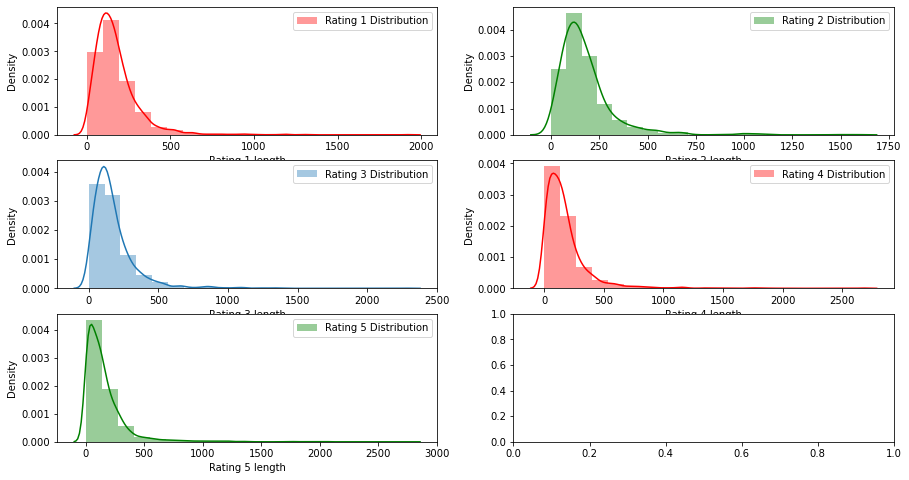

In [21]:
# Message distribution after cleaning

f,ax= plt.subplots(3,2,figsize = (15,8))

sns.distplot(data_ratings[data_ratings['Product_Rating']==1.0]['clean_length'],bins=20,ax=ax[0,0], label = 'Rating 1 Distribution', color ='r')

ax[0,0].set_xlabel('Rating 1 length')
ax[0,0].legend()


sns.distplot(data_ratings[data_ratings['Product_Rating']==2.0]['clean_length'],bins=20,ax=ax[0,1], label = 'Rating 2 Distribution', color = 'g')

ax[0,1].set_xlabel('Rating 2 length')
ax[0,1].legend()


sns.distplot(data_ratings[data_ratings['Product_Rating']==3.0]['clean_length'],bins=20,ax=ax[1,0], label = 'Rating 3 Distribution')

ax[1,0].set_xlabel('Rating 3 length')
ax[1,0].legend()


sns.distplot(data_ratings[data_ratings['Product_Rating']==4.0]['clean_length'],bins=20,ax=ax[1,1], label = 'Rating 4 Distribution', color = 'r')

ax[1,1].set_xlabel('Rating 4 length')
ax[1,1].legend()



sns.distplot(data_ratings[data_ratings['Product_Rating']==5.0]['clean_length'],bins=20,ax=ax[2,0], label = 'Rating 5 Distribution', color= 'g')

ax[2,0].set_xlabel('Rating 5 length')
ax[2,0].legend()


plt.show()

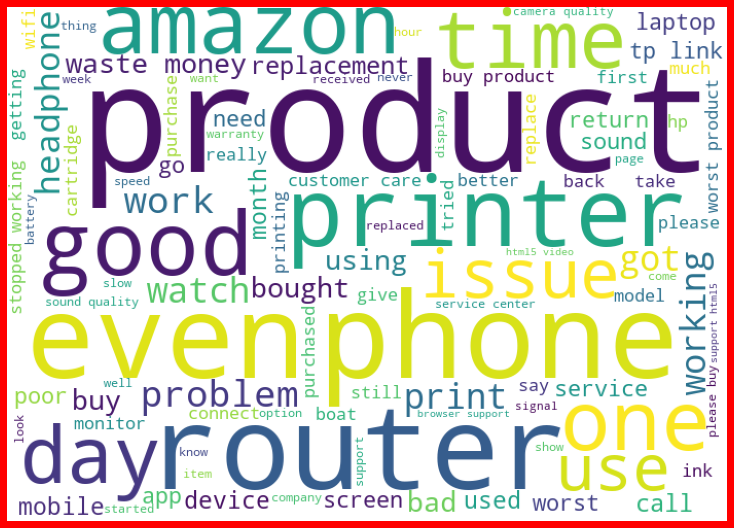

In [22]:
# loud words in Rating 1

from wordcloud import WordCloud

star_1 = data_ratings['Product_Review'][data_ratings['Product_Rating']==1.0]

star_1_cloud = WordCloud(width=700, height=500, background_color='white', max_words=100).generate(' '.join(star_1))


plt.figure(figsize = (10,8), facecolor='r')
plt.imshow(star_1_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

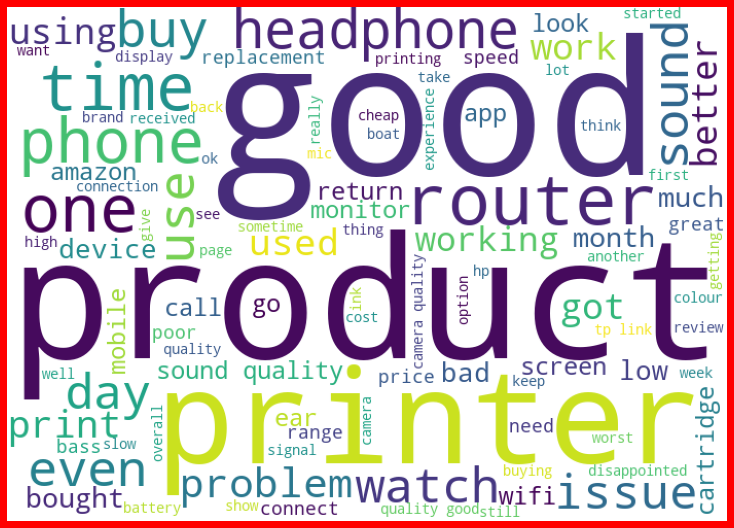

In [23]:
# loud words in Rating 2

from wordcloud import WordCloud

star_2 = data_ratings['Product_Review'][data_ratings['Product_Rating']==2.0]

star_2_cloud = WordCloud(width=700, height=500, background_color='white', max_words=100).generate(' '.join(star_2))


plt.figure(figsize = (10,8), facecolor='r')
plt.imshow(star_2_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

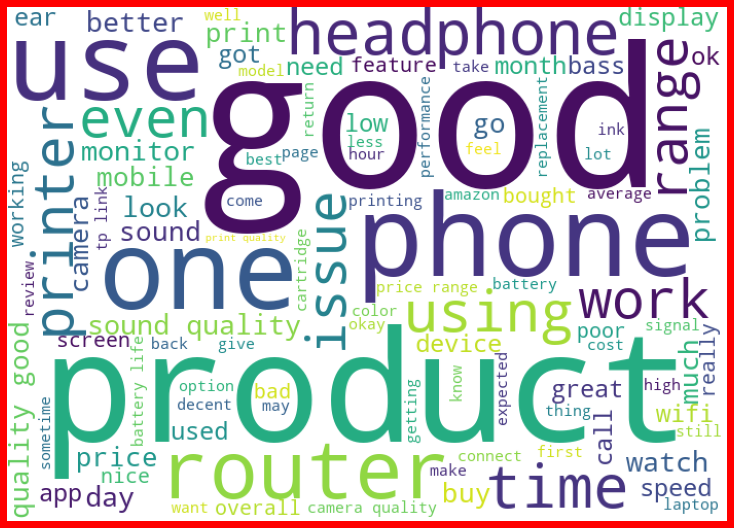

In [24]:
# loud words in Rating 3

from wordcloud import WordCloud

star_3 = data_ratings['Product_Review'][data_ratings['Product_Rating']==3.0]

star_3_cloud = WordCloud(width=700, height=500, background_color='white', max_words=100).generate(' '.join(star_3))


plt.figure(figsize = (10,8), facecolor='r')
plt.imshow(star_3_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

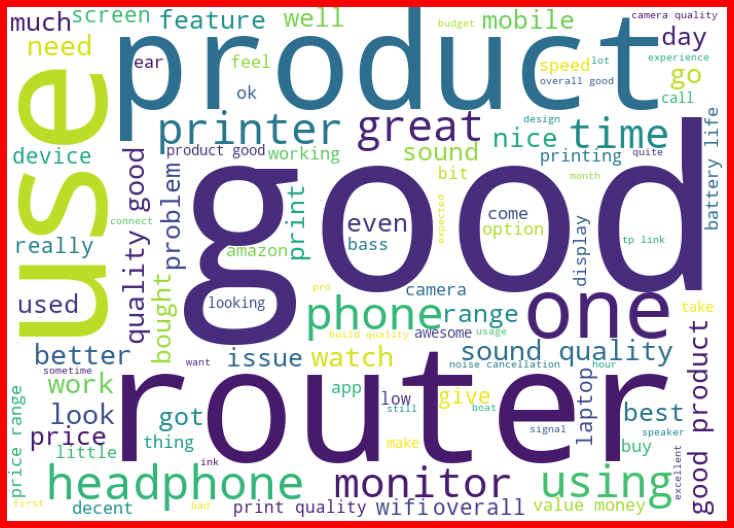

In [25]:
# loud words in Rating 4

from wordcloud import WordCloud

star_4 = data_ratings['Product_Review'][data_ratings['Product_Rating']==4.0]

star_4_cloud = WordCloud(width=700, height=500, background_color='white', max_words=100).generate(' '.join(star_4))


plt.figure(figsize = (10,8), facecolor='r')
plt.imshow(star_4_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

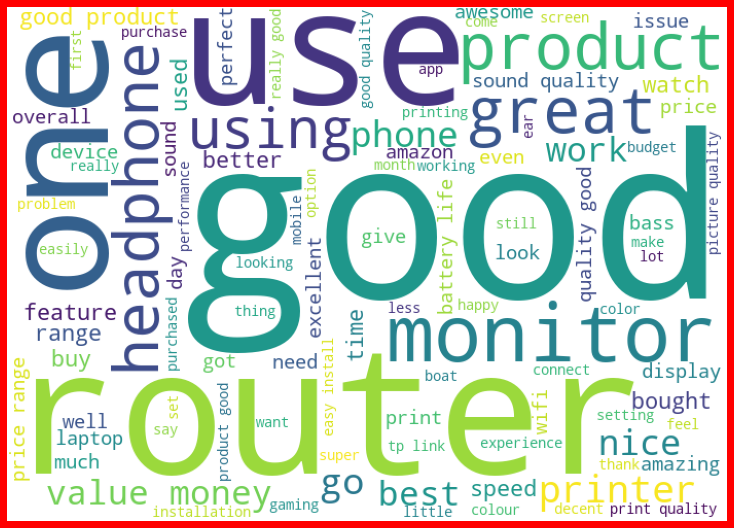

In [26]:
# loud words in Rating 5

from wordcloud import WordCloud

star_5 = data_ratings['Product_Review'][data_ratings['Product_Rating']==5.0]

star_5_cloud = WordCloud(width=700, height=500, background_color='white', max_words=100).generate(' '.join(star_5))


plt.figure(figsize = (10,8), facecolor='r')
plt.imshow(star_5_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
# convert text into vectors using Tf-Idf
# instantiate MultinomialNB classifier
# Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(data_ratings['Product_Review'])

X = features
y = data_ratings['Product_Rating']

In [31]:
# train and predict
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

naive.fit(X_train, y_train)

y_pred = naive.predict(X_test)

print('Final score =', accuracy_score(y_test, y_pred))

Final score = 0.551


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.70      0.74      0.72      1197
         2.0       0.00      0.00      0.00       353
         3.0       0.00      0.00      0.00       551
         4.0       0.40      0.02      0.05       997
         5.0       0.50      0.97      0.66      1902

    accuracy                           0.55      5000
   macro avg       0.32      0.35      0.28      5000
weighted avg       0.44      0.55      0.43      5000



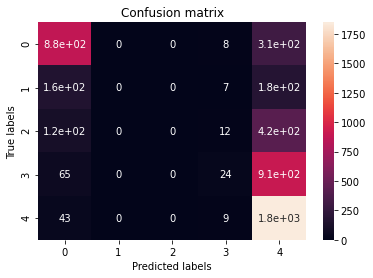

In [33]:
# plotting confusion matrix heat map

conf_mat = confusion_matrix(y_test, y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat, annot=True, ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')

ax.set_title('Confusion matrix')

plt.show()

In [34]:
conf_mat

array([[ 881,    0,    0,    8,  308],
       [ 161,    0,    0,    7,  185],
       [ 115,    0,    0,   12,  424],
       [  65,    0,    0,   24,  908],
       [  43,    0,    0,    9, 1850]], dtype=int64)

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score



#KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_g = KNeighborsClassifier()

params_knn_g = {'n_neighbors': [5, 50, 100],
                'p': [1, 2]}

grid_knn_g = GridSearchCV(knn_g, param_grid = params_knn_g, scoring='accuracy', cv=5)

grid_knn_g.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 50, 100], 'p': [1, 2]},
             scoring='accuracy')

In [44]:
#create model with the best estimators from the grid search
model_knn_g = grid_knn_g.best_estimator_

In [60]:
#get the models score in cross-validation on the training set with 10 folds
crossval_knn_g_10 = cross_val_score(model_knn_g, X_train, y_train, cv=10, scoring='accuracy')
print(crossval_knn_g_10)
print(crossval_knn_g_10.mean())

[0.51866667 0.498      0.514      0.52933333 0.492      0.50666667
 0.50266667 0.50133333 0.5        0.51      ]
0.5072666666666666


In [61]:
#get the models score in cross-validation on the training set with 3 folds
crossval_knn_g_3 = cross_val_score(model_knn_g, X_train, y_train, cv=3, scoring='accuracy')
print(crossval_knn_g_3)
print(crossval_knn_g_3.mean())

[0.5138 0.5104 0.499 ]
0.5077333333333334


In [62]:
knn_g.fit(X_train, y_train)

y_pred = knn_g.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.68      0.08      0.14      1197
         2.0       0.80      0.11      0.19       353
         3.0       0.16      0.31      0.21       551
         4.0       0.27      0.28      0.28       997
         5.0       0.42      0.61      0.50      1902

    accuracy                           0.35      5000
   macro avg       0.47      0.28      0.26      5000
weighted avg       0.45      0.35      0.32      5000



In [35]:
# instantiate Linear SVC classifier
from sklearn.svm import LinearSVC

In [36]:
clf = LinearSVC(C=10)
clf.fit(X_train, y_train)

LinearSVC(C=10)

In [37]:
y_pred = clf.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.71      0.71      0.71      1197
         2.0       0.40      0.34      0.37       353
         3.0       0.42      0.36      0.39       551
         4.0       0.46      0.44      0.45       997
         5.0       0.68      0.75      0.71      1902

    accuracy                           0.61      5000
   macro avg       0.54      0.52      0.53      5000
weighted avg       0.60      0.61      0.60      5000



In [66]:
#get the models score in cross-validation on the training set with 3 folds
crossval_clf = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
print(crossval_clf)
print(crossval_clf.mean())

[0.5596 0.5546 0.5618]
0.5586666666666665


In [67]:
#get the models score in cross-validation on the training set with 10 folds
crossval_clf_10 = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(crossval_clf_10)
print(crossval_clf_10.mean())

[0.58266667 0.59533333 0.592      0.58466667 0.58733333 0.578
 0.58533333 0.58133333 0.60333333 0.58333333]
0.5873333333333333


In [64]:
#  save the model

import pickle

f = open('rating_prediction_clf.pickle', 'wb')

pickle.dump(clf, f)

f.close()

In [65]:
# To load/restore the saved model

import pickle

f = open('rating_prediction_clf.pickle', 'rb')

classifier = pickle.load(f)

f.close()

In [68]:
def clean_text(x):
    x= str(x).replace(r'[^\w\d\s]', ' ')
    x= str(x).replace(r'\s+', ' ')
    x= str(x).replace(r'^\s+|\s+?$', ' ')
    return x

In [69]:
# testing the model
x = 'this product is really good. thanks'
vec = tf_vec.transform([x])
clf.predict(vec)

array([5.])

In [70]:
# testing the model
x = 'this product is really bad. i do not like it'
vec = tf_vec.transform([x])
clf.predict(vec)

array([1.])

In [71]:
# testing the model
x = "You can't listen anything. Its extremely low and forget about connecting any sound device like woofer or bt speaker to the aux output at the back because it somehow eat all the sound."
x = clean_text(x)
vec = tf_vec.transform([x])
clf.predict(vec)

array([2.])